# ĐỒ ÁN CUỐI KỲ LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
## THÀNH VIÊN
|MÃ SỐ|HỌ TÊN|
|:----:|:---:|
|19127472|NGUYỄN BÁ MINH|
|19127481|TRẦN HOÀNG NAM|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## GIỚI THIỆU ĐỒ ÁN
**Đề tài đồ án**: Tìm hiểu và phân tích những yếu tố trong 10 phút đầu của 1 trận đấu liên minh huyền thoại có ảnh hưởng như thế nào đến kết quả trận đấu
- Dữ liệu các trận đấu được lấy ở [link này](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min)
- Dữ liệu có License CC0: Public Domain
- Dữ liệu gồm 1 file duy nhất là data.csv
- Dữ liệu chứa thông tin của khoảng 10.000 trận đấu ở rank kim cương - cao thủ trong khoảng 10 phút đầu game
- Dữ liệu 1 dòng là thông tin của đội xanh và đội đỏ, mỗi đội sẽ có 19 cột chứa thông tin, tổng có 38 cột và 1 cột bluewin là cột kết quả trận đấu, 1 cột id là id của trận đấu, id này có thể dùng để lấy thêm thông tin từ API của riot game, vậy có tất cả 40 cột

### Đọc dữ liệu từ file data.csv và khám phá dữ liệu

In [2]:
data_df = pd.read_csv('data.csv')
data_df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
data_df.shape

(9879, 40)

#### Dữ liệu có bao nhiêu dòng, cột, có cột nào có dữ liệu thiếu không, có vấn đề gì với các cột không
- Ta thấy rằng có chính xác 40 cột và 9.879 dòng, tức là khoảng 10.000 dòng như mô tả.
- Xem xét sơ các cột, ta thấy rằng không có dữ liệu thiếu, không có vấn đề gì cả.

#### Dữ liệu có bị lặp hay không

In [5]:
np.any(data_df.duplicated())

False

### TÌM HIỂU VÀ PHÂN TÍCH

#### NGUYỄN BÁ MINH

#### TRẦN HOÀNG NAM
##### Câu hỏi 1: Nếu chúng ta thua gold hay exp trong 10' phút đầu thì liệu chúng ta có cơ hội chiến thắng trận đấu hay không? 
Nếu trả lời được câu hỏi này, chúng ta sẽ biết được nên giữ cho khoảng cách exp và gold cách biệt ở mức nào để có khả năng lật ngược ván đấu, cũng như cách biệt như thế nào thì khả năng thắng của chúng ta chắc chắn hơn

Chúng ta sẽ xem xét sơ qua tỉ lệ thắng thua giữa 2 đội trong bộ dữ liệu xem có sự chênh lệch hay không

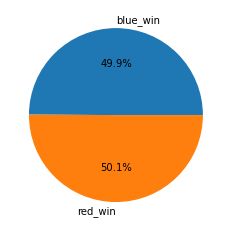

In [6]:
blue_win_percent = (data_df['blueWins']==1).mean()*100
red_win_percent = 100 - blue_win_percent
plt.pie([blue_win_percent,red_win_percent],labels=['blue_win','red_win'],autopct='%1.1f%%')
plt.show()

**Nhận xét**: Có vẻ tỉ lệ thắng thua giữa 2 bên có khá là cân bằng, không có vấn đề gì nếu giải quyết câu hỏi trên tập dữ liệu này

Đầu tiên, chúng ta sẽ lọc ra những attribute của đội xanh và đỏ và lưu chúng vào 2 biến **red_att** and **blue_att**

In [7]:
blue_att = [x for x in data_df.keys() if 'blue' in x]
blue_att.remove('blueWins')
red_att = [x for x in data_df.keys() if 'red' in x]

Chúng ta sẽ viết hàm để tính giá trị trung bình, độ lệch chuẩn của exp, gold 

In [8]:
def mean_std(data,team='blue'):
    mean_exp = data[team+'TotalExperience'].mean()
    std_exp = data[team+'TotalExperience'].std()
    mean_gold = data[team+'TotalGold'].mean()
    std_gold = data[team+'TotalGold'].std()
    return mean_exp, std_exp, mean_gold, std_gold

Hàm std_range_percent sẽ làm các việc sau đây:
- Chuyển gold, exp về dạng z-score
- Lọc ra nhưng mẫu có z-score thuộc khoảng (std_start, std_end]
- Tính tỉ lệ thắng của các mẫu đó

In [9]:
def std_range_percent(data,range_std_start,range_std_end,team='blue'):
    mean_exp, std_exp, mean_gold, std_gold = mean_std(data,team)
    data['z_score_'+team+'_exp'] = (data[team+'TotalExperience'] - mean_exp)/std_exp
    data['z_score_'+team+'_gold'] = (data[team+'TotalGold'] - mean_gold)/std_gold
    data_exp = data[((data['z_score_'+team+'_exp']>range_std_start)&(data['z_score_'+team+'_exp']<=range_std_end))]
    data_gold = data[(data['z_score_'+team+'_gold']>range_std_start)&(data['z_score_'+team+'_gold']<=range_std_end)]
    if team == 'blue':
        return (data_exp['blueWins']==1).mean()*100, (data_gold['blueWins']==1).mean()*100
    else:
        return (data_exp['blueWins']==0).mean()*100, (data_gold['blueWins']==0).mean()*100

Ở đây, chúng ta sẽ xem xét nếu lượng exp, gold chêch khỏi độ lệch bao nhiêu thì vẫn có khả năng gỡ lại

In [10]:
std_check=[[-3,-2],[-2,-1],[-1,0],[0,1],[1,2],[2,3]]

In [11]:
blue_win_percent_by_exp = []
blue_win_percent_by_gold = []
red_win_percent_by_exp = []
red_win_percent_by_gold = []
for x in std_check:
    win_exp, win_gold = std_range_percent(data_df,x[0],x[1],team='blue')
    blue_win_percent_by_exp.append(win_exp)
    blue_win_percent_by_gold.append(win_gold)
    win_exp, win_gold = std_range_percent(data_df,x[0],x[1],team='red')
    red_win_percent_by_exp.append(win_exp)
    red_win_percent_by_gold.append(win_gold)

Block này chỉ dùng để tiện cho việc rename lại index các dòng

In [12]:
range_std_list = {}
for x in range(0,len(std_check)):
    range_std_list[x]=std_check[x]

- Chúng ta sẽ tiến hành tạo dataframe cho 4 kết quả vừa thu được ở trên, các list dữ liệu ở trên chỉ là tỉ lệ thắng, chúng ta sẽ tính cả tỉ lệ thua bằng cách lấy 100 - tỉ lệ thắng lưu vào 1 cột gọi là lose by exp, lose by gold trong các dataframe tương ứng
- Do 1 trận đấu chúng ta có 2 gồm đội xanh và đội đỏ, vì thế nên chúng ta sẽ phải tạo ra 4 dataframe gồm:
    - 

In [13]:
#Tạo dataframe mục đích cho việc xem xét các thông số
blue_win_percent_by_exp = pd.DataFrame(blue_win_percent_by_exp)
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(index=range_std_list)
blue_win_percent_by_exp['lose rate calculate by exp'] = 100 - blue_win_percent_by_exp['win rate calculate by exp'] 

blue_win_percent_by_gold = pd.DataFrame(blue_win_percent_by_gold)
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(index=range_std_list)
blue_win_percent_by_gold['lose rate calculate by gold'] = 100 - blue_win_percent_by_gold['win rate calculate by gold'] 

red_win_percent_by_exp = pd.DataFrame(red_win_percent_by_exp)
red_win_percent_by_exp = red_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
red_win_percent_by_exp = red_win_percent_by_exp.rename(index=range_std_list)
red_win_percent_by_exp['lose rate calculate by exp'] = 100 - red_win_percent_by_exp['win rate calculate by exp'] 

red_win_percent_by_gold = pd.DataFrame(red_win_percent_by_gold)
red_win_percent_by_gold = red_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
red_win_percent_by_gold = red_win_percent_by_gold.rename(index=range_std_list)
red_win_percent_by_gold['lose rate calculate by gold'] = 100 - red_win_percent_by_gold['win rate calculate by gold'] 

In [14]:
blue_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",9.417040,90.582960
"[-2, -1]",21.704815,78.295185
"[-1, 0]",39.538369,60.461631
"[0, 1]",59.039954,40.960046
"[1, 2]",80.754996,19.245004
"[2, 3]",93.023256,6.976744


In [15]:
blue_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",2.040816,97.959184
"[-2, -1]",18.683652,81.316348
"[-1, 0]",39.399676,60.600324
"[0, 1]",62.293520,37.706480
"[1, 2]",79.313233,20.686767
"[2, 3]",89.781022,10.218978


In [16]:
red_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",11.538462,88.461538
"[-2, -1]",22.377049,77.622951
"[-1, 0]",39.579685,60.420315
"[0, 1]",59.653179,40.346821
"[1, 2]",79.613095,20.386905
"[2, 3]",89.221557,10.778443


In [17]:
red_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",7.000000,93.000000
"[-2, -1]",18.024862,81.975138
"[-1, 0]",41.205345,58.794655
"[0, 1]",61.224490,38.775510
"[1, 2]",79.402262,20.597738
"[2, 3]",87.931034,12.068966


Để cho dễ nhìn, chúng ta sẽ trực quan hoá hết 4 table trên bằng stackbarchart

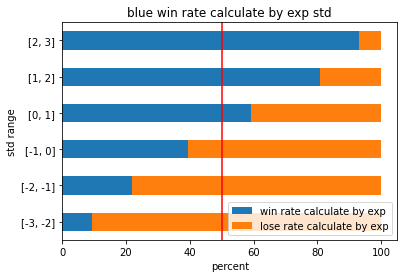

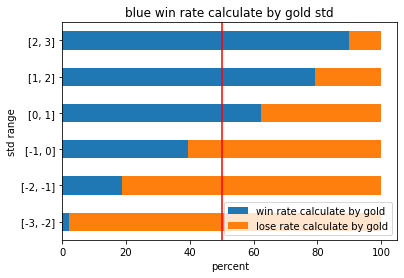

In [18]:
blue_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('blue win rate calculate by exp std')
blue_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.title('blue win rate calculate by gold std')
plt.xlabel('percent')
plt.show()

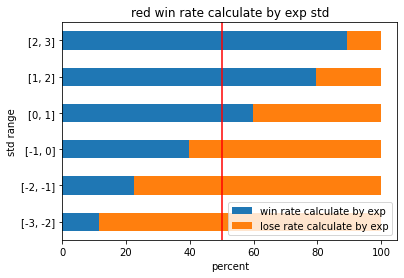

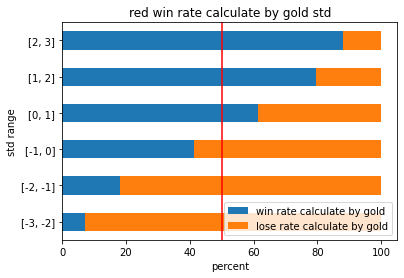

In [19]:
red_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by exp std')
red_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by gold std')
plt.show()

**Nhận xét**: Nhìn chung, với sự chênh lệch về gold và exp càng cao thì tỉ lệ tách biệt thắng thua sẽ càng cao, nhưng theo biểu đồ trên, chúng ta dễ dàng nhận thấy, độ chêck trong khoản từ -1 cho đến 1 độ lệch chuẩn của gold và exp thì tỉ lệ thắng thua chỉ là khoảng 40-60 hoặc ngược lại,tính ra không quá chênh lệch với tỉ lệ thắng thua ngẫu nhiên là 50%, và nếu so tỉ lệ thắng của đội xanh,đỏ trong mẫu dữ liệu ban đầu thì cũng không chênh lệch quá nhiều, nhưng từ 1 đến 2 lại thì tỉ lệ thắng thua  lại tăng thêm hẳn 20%, nghĩa là để lật ngược 1 ván đấu, thì chúng ta cần giữ cho độ chênh về gold và exp không vượt quá 1 độ lệch chuẩn thì vẫn còn đủ khả năng để thắng ngược, tuy nhiên dù cho độ chênh lệch có cao thế nào thì vẫn không chắc chắn việc thắng thua hoàn toàn được, vẫn có khoảng 10% tỉ lệ thắng khi sự chênh lệch tầm khoảng 2 đến 3 độ lệch chuẩn, có vẻ ngoài gold và exp thì vẫn có những yếu tố khác ảnh hưởng, hoặc cũng có thể sau khi qua 10' đầu của trận đấu thì độ lệch này đã được thay đổi, chúng ta sẽ xem xét đến các mục tiêu lớn

##### Câu hỏi 2: Khi ăn các mục tiêu lớn thì khả năng thắng tăng như thế nào?

<p>Có 2 mục tiêu lớn mà chúng ta cần quan tâm là rồng và sứ giả, tạm thời chúng ta sẽ xem xét dragon trước</p>
Chúng ta sẽ lọc ra những trận đấu mà đội đỏ ăn rồng và đội xanh ăn rồng, sau đó lưu vào 2 biến <b>red_dragon</b> và <b>blue_dragon</b>

In [20]:
red_dragon = (data_df[data_df['redDragons']!=0]).copy()
blue_dragon = (data_df[(data_df['blueDragons']!=0)]).copy()

Chúng ta sẽ tính tỉ lệ thắng đối với các đội ăn được rồng

In [21]:
red_dragon_wins = (red_dragon["blueWins"]==0).mean()*100
blue_dragon_wins = (blue_dragon["blueWins"]==1).mean()*100
print(f'Tỉ lệ thắng của đội xanh khi ăn rồng là: {blue_dragon_wins:<.2f}%')
print(f'Tỉ lệ thắng của đội đỏ khi ăn rồng là: {red_dragon_wins:<.2f}%')

Tỉ lệ thắng của đội xanh khi ăn rồng là: 64.09%
Tỉ lệ thắng của đội đỏ khi ăn rồng là: 62.58%


Tương tự như ở **câu hỏi 1**, chúng ta sẽ tính tỉ lệ thắng dựa trên gold và exp bằng 2 bộ dữ liệu đã lọc ra là **blue_dragon** và **red_dragon**

In [22]:
std_check = [[-3,-2],[-2,-1],[-1,0],[0,1],[1,2],[2,3]]
blue_win_percent_by_exp = []
blue_win_percent_by_gold = []
red_win_percent_by_exp = []
red_win_percent_by_gold = []
for x in std_check:
    win_rate_by_exp_std, win_rate_by_gold_std = std_range_percent(blue_dragon,x[0],x[1])
    blue_win_percent_by_exp.append(win_rate_by_exp_std)
    blue_win_percent_by_gold.append(win_rate_by_gold_std)
    win_rate_by_exp_std, win_rate_by_gold_std = std_range_percent(red_dragon,x[0],x[1],team='red')
    red_win_percent_by_exp.append(win_rate_by_exp_std)
    red_win_percent_by_gold.append(win_rate_by_gold_std)

In [23]:
blue_win_percent_by_exp = pd.DataFrame(blue_win_percent_by_exp)
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(index=range_std_list)
blue_win_percent_by_exp['lose rate calculate by exp'] = 100 - blue_win_percent_by_exp['win rate calculate by exp'] 

blue_win_percent_by_gold = pd.DataFrame(blue_win_percent_by_gold)
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(index=range_std_list)
blue_win_percent_by_gold['lose rate calculate by gold'] = 100 - blue_win_percent_by_gold['win rate calculate by gold'] 

red_win_percent_by_exp = pd.DataFrame(red_win_percent_by_exp)
red_win_percent_by_exp = red_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
red_win_percent_by_exp = red_win_percent_by_exp.rename(index=range_std_list)
red_win_percent_by_exp['lose rate calculate by exp'] = 100 - red_win_percent_by_exp['win rate calculate by exp'] 

red_win_percent_by_gold = pd.DataFrame(red_win_percent_by_gold)
red_win_percent_by_gold = red_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
red_win_percent_by_gold = red_win_percent_by_gold.rename(index=range_std_list)
red_win_percent_by_gold['lose rate calculate by gold'] = 100 - red_win_percent_by_gold['win rate calculate by gold'] 

In [24]:
blue_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",21.917808,78.082192
"[-2, -1]",35.331906,64.668094
"[-1, 0]",56.389118,43.610882
"[0, 1]",72.516026,27.483974
"[1, 2]",91.056911,8.943089
"[2, 3]",100.000000,0.000000


In [25]:
blue_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",10.000000,90.000000
"[-2, -1]",39.583333,60.416667
"[-1, 0]",55.808656,44.191344
"[0, 1]",73.752151,26.247849
"[1, 2]",89.024390,10.975610
"[2, 3]",94.392523,5.607477


In [26]:
red_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",18.627451,81.372549
"[-2, -1]",40.076336,59.923664
"[-1, 0]",54.668567,45.331433
"[0, 1]",70.749280,29.250720
"[1, 2]",87.413793,12.586207
"[2, 3]",90.140845,9.859155


In [27]:
red_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",15.217391,84.782609
"[-2, -1]",33.996683,66.003317
"[-1, 0]",56.386499,43.613501
"[0, 1]",72.641509,27.358491
"[1, 2]",86.770428,13.229572
"[2, 3]",88.235294,11.764706


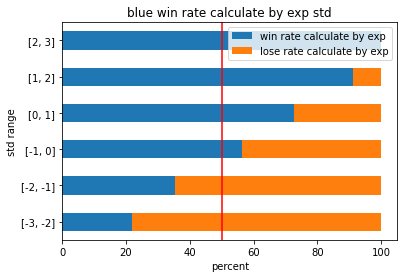

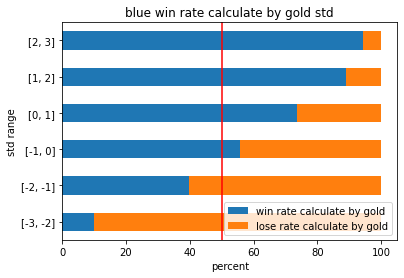

In [28]:
blue_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('blue win rate calculate by exp std')
blue_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('blue win rate calculate by gold std')
plt.show()

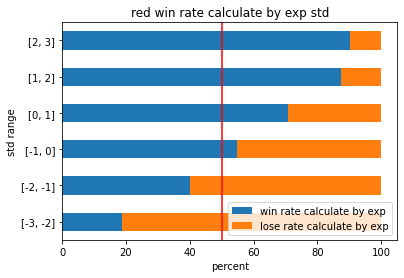

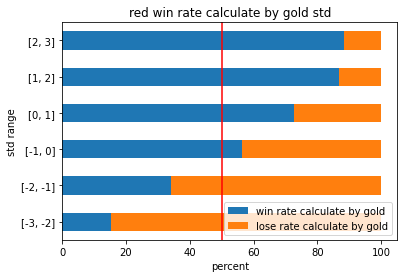

In [29]:
red_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by exp std')
red_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by gold std')
plt.show()

**Nhận xét**: so sánh 4 biểu đồ ở câu 1 với 4 biểu đồ trên, chúng ta nhận thấy tỉ lệ thắng khi ăn rồng đã tăng lên đáng kể, ngay cả khi vàng và exp thua đối thủ khoảng 1 đến 2 độ lệch chuẩn thì tỉ lệ thắng vẫn hơn 30%, nếu chỉ thua trong tầm khoảng 0-1 độ lệch chuẩn thì tỉ lệ thắng lại hơn 50%, nếu không ăn rồng thì 2 con số này chỉ tầm 20% và 40% như phần biểu đồ trong **câu hỏi 1**

Tóm lại, khi đang trong thế thua của 1 ván đấu, nhất là về exp và gold thì bạn cần tập trung vào mục tiêu lớn là rồng, việc ăn rồng có thể bù đắp được việc thua về lượng exp và gold nhận được ở trong khoảng chêch lệch 1 độ lệch chuẩn

Còn 1 mục tiêu lớn còn lại là sứ giả, trong 1 trận đấu, **giả sử đội bạn đang ăn rồng, thì chúng ta nên ăn sứ giả, hay là tham gia tranh chấp rồng?**

Tương tự như phần trên, chúng ta sẽ lọc ra các trận đội xanh, đỏ ăn sứ giả và lưu vào biến **blue_herald** và **red_herald**

In [30]:
blue_herald = (data_df[data_df['blueHeralds']!=0]).copy()
red_herald = (data_df[data_df['redHeralds']!=0]).copy()

Dễ dàng chúng ta tính được tỉ lệ thắng của các đội chọn ăn sứ giả là

In [31]:
print(f'Tỉ lệ thắng của đội xanh khi ăn sứ giả là: {(blue_herald["blueWins"]==1).mean()*100:<.2f}')
print(f'Tỉ lệ thắng của đội đỏ khi ăn sứ giả là: {(red_herald["blueWins"]==0).mean()*100:<.2f}')

Tỉ lệ thắng của đội xanh khi ăn sứ giả là: 59.50
Tỉ lệ thắng của đội đỏ khi ăn sứ giả là: 61.23


**Nhận xét**: Có vẻ như tỉ lệ thắng của các đội chọn ăn sứ giả thấp hơn là các đội chọn ăn rồng ở 10' đầu trận đấu, nhưng tỉ lệ chêch lệch chỉ khoảng 5%, chúng ta có thể tạm chấp nhận được

In [32]:
std_check = [[-3,-2],[-2,-1],[-1,0],[0,1],[1,2],[2,3]]
blue_win_percent_by_exp = []
blue_win_percent_by_gold = []
red_win_percent_by_exp = []
red_win_percent_by_gold = []
for x in std_check:
    win_rate_by_exp_std, win_rate_by_gold_std = std_range_percent(blue_herald,x[0],x[1])
    blue_win_percent_by_exp.append(win_rate_by_exp_std)
    blue_win_percent_by_gold.append(win_rate_by_gold_std)
    win_rate_by_exp_std, win_rate_by_gold_std = std_range_percent(red_herald,x[0],x[1],team='red')
    red_win_percent_by_exp.append(win_rate_by_exp_std)
    red_win_percent_by_gold.append(win_rate_by_gold_std)

In [33]:
blue_win_percent_by_exp = pd.DataFrame(blue_win_percent_by_exp)
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(index=range_std_list)
blue_win_percent_by_exp['lose rate calculate by exp'] = 100 - blue_win_percent_by_exp['win rate calculate by exp'] 

blue_win_percent_by_gold = pd.DataFrame(blue_win_percent_by_gold)
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(index=range_std_list)
blue_win_percent_by_gold['lose rate calculate by gold'] = 100 - blue_win_percent_by_gold['win rate calculate by gold'] 

red_win_percent_by_exp = pd.DataFrame(red_win_percent_by_exp)
red_win_percent_by_exp = red_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
red_win_percent_by_exp = red_win_percent_by_exp.rename(index=range_std_list)
red_win_percent_by_exp['lose rate calculate by exp'] = 100 - red_win_percent_by_exp['win rate calculate by exp'] 

red_win_percent_by_gold = pd.DataFrame(red_win_percent_by_gold)
red_win_percent_by_gold = red_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
red_win_percent_by_gold = red_win_percent_by_gold.rename(index=range_std_list)
red_win_percent_by_gold['lose rate calculate by gold'] = 100 - red_win_percent_by_gold['win rate calculate by gold'] 

In [34]:
blue_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",23.076923,76.923077
"[-2, -1]",30.705394,69.294606
"[-1, 0]",53.917051,46.082949
"[0, 1]",67.096774,32.903226
"[1, 2]",81.467181,18.532819
"[2, 3]",97.674419,2.325581


In [35]:
blue_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",5.263158,94.736842
"[-2, -1]",32.222222,67.777778
"[-1, 0]",50.877193,49.122807
"[0, 1]",70.151771,29.848229
"[1, 2]",84.782609,15.217391
"[2, 3]",94.117647,5.882353


In [36]:
red_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",16.216216,83.783784
"[-2, -1]",32.512315,67.487685
"[-1, 0]",53.644860,46.355140
"[0, 1]",71.480804,28.519196
"[1, 2]",85.217391,14.782609
"[2, 3]",86.363636,13.636364


In [37]:
red_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",0.000000,100.000000
"[-2, -1]",28.691983,71.308017
"[-1, 0]",55.631399,44.368601
"[0, 1]",71.779141,28.220859
"[1, 2]",86.473430,13.526570
"[2, 3]",93.181818,6.818182


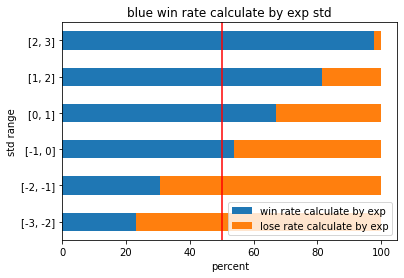

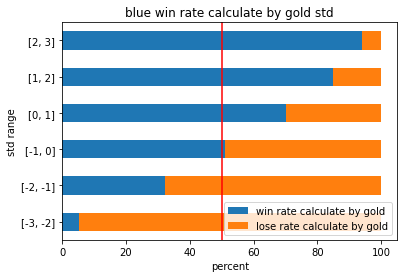

In [38]:
blue_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('blue win rate calculate by exp std')
blue_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('blue win rate calculate by gold std')
plt.show()

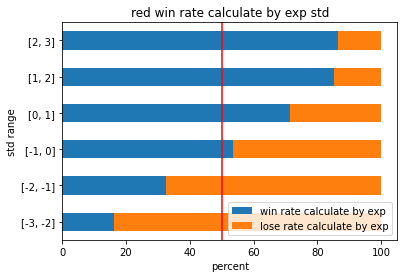

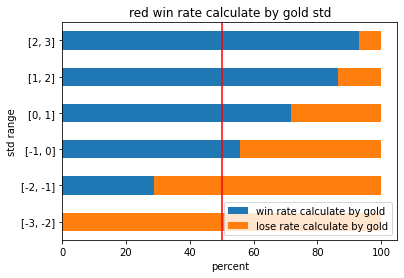

In [39]:
red_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by exp std')
red_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by gold std')
plt.show()

**Nhận xét**: So sánh với những đội chọn ăn rồng, thì có vẻ như tỉ lệ thắng có vẻ thấp hơn một vài %, điều này có thể chấp nhận được, nhưng chúng ta hãy để ý đến lượng gold, có vẻ nếu mà 1 đội thua quá xa về lượng gold thì việc ăn sứ giả không có bất cứ tác dụng nào cả khi so sánh với những đội chọn ăn rồng

**Kết luận rút ra sau 2 câu hỏi**: Gold và exp là 2 yếu tố quan trọng để thắng trận đấu, nhưng nếu bạn không thể nào có đủ lượng gold và exp như đối thủ, thì hãy cố gắng đừng để khoảng cách đó quá xa khỏi 1 độ lệch chuẩn, tuy nhiên, nếu không thể giữ được khoảng cách đó, thì team của bạn cần tập trung nhiều vào những mục tiêu lớn cụ thể là rồng, đặc biệt nếu team bạn đang thua về gold, thì bắt buột mục tiêu lớn phải là rồng, vì sứ giả sẽ không thể bù đắp được cho bạn nếu lượng vàng thua quá lớn